In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector
import re
%matplotlib widget

Load data

In [2]:
numbers = []
FILENAME="datasets/data_to_train.txt"
with open(FILENAME) as file:
    data = file.read().splitlines()
    for row in data:
        numbers.append([float(row.split()[0])])

In [3]:
WINDOW_SIZE = 150
SELECTION_SIZE = 10
current_start_index = 0

In [4]:
def plot_data(start_index=0):
    plt.cla()  # Clear current axes
    end_index = start_index + WINDOW_SIZE
    plt.plot(numbers[start_index:end_index], '-o', ms=4, picker=5)  # 'picker=5' allows points to be clickable
    plt.title('Interactive Plot')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True)
    plt.tight_layout()
    fig.canvas.draw()

In [5]:
def on_key(event):
    global current_start_index
    if event.key == 'right':
        current_start_index += SELECTION_SIZE
        if current_start_index > len(numbers) - WINDOW_SIZE:
            current_start_index = len(numbers) - WINDOW_SIZE
    elif event.key == 'left':
        current_start_index -= SELECTION_SIZE
        if current_start_index < 0:
            current_start_index = 0
    plot_data(current_start_index)

In [6]:
def onselect(xmin, xmax):
    global current_start_index
    range_ = int(xmax) - int(xmin)
    if range_ >= SELECTION_SIZE:  # If more than 10 points are selected, just pick the first 10
        selected_points = number_strings[int(xmin)+current_start_index:int(xmin + SELECTION_SIZE)+current_start_index]
        with open('datasets/' + files[0], "a") as file:
            file.write(f'{" ".join(selected_points)}\n')

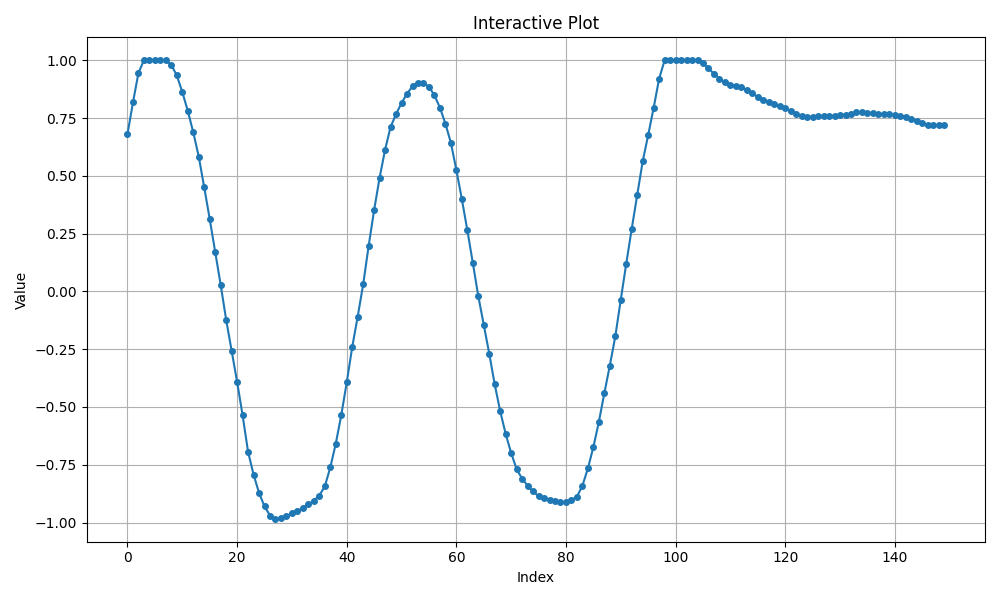

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.canvas.mpl_connect('key_press_event', on_key)
fig.canvas.mpl_connect('pick_event', onselect)

span = SpanSelector(
    ax,
    onselect,
    "horizontal",
    useblit=True,
    props=dict(alpha=0.5, facecolor="tab:blue"),
    interactive=True,
    drag_from_anywhere=True,
    minspan=10,
)

plot_data()